<a href="https://colab.research.google.com/github/WakwUp1125/DKU_OPENSOURCE_1/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


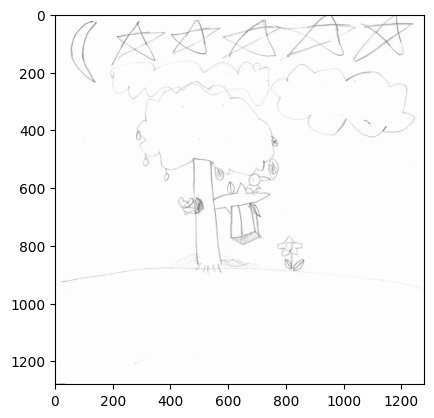

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("/content/drive/MyDrive/오픈소스Ai/나무_7_남_00242.jpg")
plt.imshow(image)
plt.show()

In [6]:
import os
import torch
from torchvision import transforms
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

# 이미지를 텐서로 변환하고 [0, 1] 범위로 정규화하는 함수
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    image = Image.open(image_path).convert("RGB")

    # 이미지를 텐서로 변환
    image_tensor = transform(image)

    # 이미지의 값이 [0, 1] 범위를 벗어나는 경우에만 정규화 수행
    if image_tensor.min() < 0 or image_tensor.max() > 1:
        image_tensor = (image_tensor - image_tensor.min()) / (image_tensor.max() - image_tensor.min())

    return image_tensor

# 이미지에 대한 설명 생성
def generate_caption(image_path, model, processor):
    # 이미지 전처리
    image = preprocess_image(image_path)

    # 모델 입력 생성
    inputs = processor(
        text="a photography of",
        images=image,
        return_tensors="pt",
        truncation=True
    )

    # 이미지에 대한 설명 생성
    out = model.generate(**inputs)
    description = processor.decode(out[0], skip_special_tokens=True)

    return description

# 모델 및 프로세서 불러오기
model_name = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name)

# 이미지 파일이 있는 디렉토리 경로
image_directory = "/content/drive/MyDrive/오픈소스Ai"

# 디렉토리에서 이미지 파일들을 가져와 처리
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg"):
        image_path = os.path.join(image_directory, filename)

        try:
            caption = generate_caption(image_path, model, processor)
            print(f"Generated Caption for {image_path}:", caption)
        except ValueError as e:
            print(f"Error processing image {image_path}: {e}")


Generated Caption for /content/drive/MyDrive/오픈소스Ai/여자사람_7_남_00046.jpg: a photography of a woman in a black dress
Generated Caption for /content/drive/MyDrive/오픈소스Ai/여자사람_7_남_00145.jpg: a photography of a woman in a black dress
Generated Caption for /content/drive/MyDrive/오픈소스Ai/남자사람_8_여_00440.jpg: a photography of a woman in a black dress
Generated Caption for /content/drive/MyDrive/오픈소스Ai/나무_10_남_00431.jpg: a photography of a moon
Generated Caption for /content/drive/MyDrive/오픈소스Ai/나무_7_남_00242.jpg: a photography of a woman in a black dress
Generated Caption for /content/drive/MyDrive/오픈소스Ai/색체이미지.jpg: a photography of a man in a suit
